### Sensitivity analysis for OW installed capacity

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler

SENSITIVITY = "cap"
DESCRIPTION = "investment cost"

CASES = ["base"] + [SENSITIVITY + "P" + str(percentage) for percentage in range(10, 40, 10)] \
                    + [SENSITIVITY + "N" + str(percentage) for percentage in range(10, 40, 10)]

DF_BY_CASES = dict({})

for case in CASES:
    _df = pd.read_csv(f'{case}/results_output_gen.csv')

    # Define case value for plots
    case_sensitivity = None
    if case == "base":
        case_sensitivity = "Base"
    elif case[-3] == "P":
        case_sensitivity = "+" + case[-2:] + "%"
    elif case[-3] == "N":
        case_sensitivity = "-" + case[-2:] + "%"
    _df["Case"] = case_sensitivity if case_sensitivity is not None else case
    
    DF_BY_CASES[case] = _df

DF_BY_CASES

{'base':           Node         GeneratorType     Period  genInvCap_MW  \
 0      BosniaH      Liginiteexisting  2020-2025      0.000000   
 1      BosniaH      Liginiteexisting  2025-2030      0.000000   
 2      BosniaH      Liginiteexisting  2030-2035      0.000000   
 3      BosniaH      Liginiteexisting  2035-2040      0.000000   
 4      BosniaH      Liginiteexisting  2040-2045      0.000000   
 ...        ...                   ...        ...           ...   
 5835  SørvestD  Windoffshorefloating  2035-2040      0.000008   
 5836  SørvestD  Windoffshorefloating  2040-2045      0.000400   
 5837  SørvestD  Windoffshorefloating  2045-2050      0.002592   
 5838  SørvestD  Windoffshorefloating  2050-2055      0.000123   
 5839  SørvestD  Windoffshorefloating  2055-2060      0.003181   
 
       genInstalledCap_MW  genExpectedCapacityFactor  \
 0            1888.000000               7.499999e-01   
 1            1161.846154               7.203815e-01   
 2             780.615385     

Merge data sets

In [194]:
df_combined = pd.concat([_df for _df in DF_BY_CASES.values()])
df_combined

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Case
0,BosniaH,Liginiteexisting,2020-2025,0.000000,1888.000000,7.499999e-01,0.000000,12404.157684,Base
1,BosniaH,Liginiteexisting,2025-2030,0.000000,1161.846154,7.203815e-01,0.000000,7331.878373,Base
2,BosniaH,Liginiteexisting,2030-2035,0.000000,780.615385,6.563768e-01,0.000000,4488.430048,Base
3,BosniaH,Liginiteexisting,2035-2040,0.000000,544.615385,2.253479e-02,0.000000,107.509666,Base
4,BosniaH,Liginiteexisting,2040-2045,0.000000,377.600000,2.098492e-07,0.000000,0.000694,Base
...,...,...,...,...,...,...,...,...,...
5835,SørvestD,Windoffshorefloating,2035-2040,0.000629,0.002709,2.712049e-01,726.764116,0.006435,-30%
5836,SørvestD,Windoffshorefloating,2040-2045,0.000332,0.003040,2.883669e-01,245.107109,0.007679,-30%
5837,SørvestD,Windoffshorefloating,2045-2050,0.003812,0.006534,2.958160e-01,1813.280217,0.016931,-30%
5838,SørvestD,Windoffshorefloating,2050-2055,0.000343,0.006523,2.683911e-01,92.797276,0.015337,-30%


Select only OW sources

In [195]:
df_ow = df_combined[(df_combined['GeneratorType'] == 'Windoffshorefloating') | (df_combined['GeneratorType'] == 'Windoffshoregrounded')]
df_ow

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Case
3296,Belgium,Windoffshoregrounded,2020-2025,0.000000,0.000000,0.000000,0.000000,0.000000,Base
3297,Belgium,Windoffshoregrounded,2025-2030,0.000000,0.000000,0.000000,0.000000,0.000000,Base
3298,Belgium,Windoffshoregrounded,2030-2035,0.000000,0.000000,0.000000,0.000000,0.000000,Base
3299,Belgium,Windoffshoregrounded,2035-2040,0.000000,0.000000,0.000000,0.000000,0.000000,Base
3300,Belgium,Windoffshoregrounded,2040-2045,0.000000,0.000000,0.000000,0.000000,0.000000,Base
...,...,...,...,...,...,...,...,...,...
5835,SørvestD,Windoffshorefloating,2035-2040,0.000629,0.002709,0.271205,726.764116,0.006435,-30%
5836,SørvestD,Windoffshorefloating,2040-2045,0.000332,0.003040,0.288367,245.107109,0.007679,-30%
5837,SørvestD,Windoffshorefloating,2045-2050,0.003812,0.006534,0.295816,1813.280217,0.016931,-30%
5838,SørvestD,Windoffshorefloating,2050-2055,0.000343,0.006523,0.268391,92.797276,0.015337,-30%


Plot capacity of offshore wind by sensitivity case

In [196]:
cap_by_period_and_case = df_ow.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().to_dict()

# Convert from MW to GW
# cap_by_period_and_case = {k: v / 1000 for k, v in cap_by_period_and_case.items()}
# cap_by_period_and_case

periods = sorted(set([period for (period, _) in cap_by_period_and_case.keys()]))
periods_displayed = [period.split("-")[1] for period in periods]

Installed offshore wind capacity (GW) by different investment cost scenarios


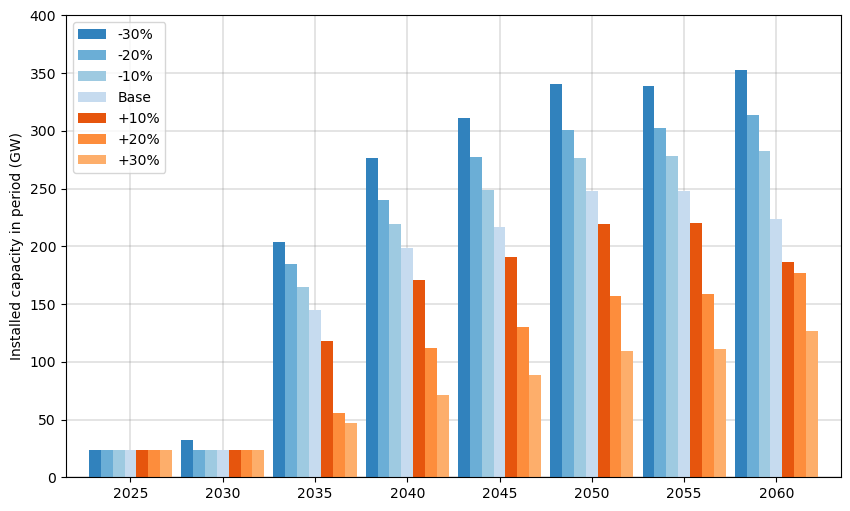

In [219]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['-30%', '-20%', '-10%', 'Base', '+10%', '+20%', '+30%']

# Plot the grouped data as a bar chart
ax = grouped_data[case_order].plot(kind='bar', figsize=(10, 6), width=0.9)

# Customize the chart
print(f'Installed offshore wind capacity (GW) by different {DESCRIPTION} scenarios')
ax.set_ylabel('Installed capacity in period (GW)')
ax.set_xlabel(None)
ax.legend(loc='upper left')
ax.set_ylim(0, 400)
ax.set_prop_cycle(cycler(color=[*plt.get_cmap('tab20c').colors, *plt.get_cmap('tab20b').colors]))
ax.yaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.xaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.set_xticklabels(periods_displayed, rotation=0)
plt.show()

#### For NO OW

In [198]:
NO_NODES = ['Nordvest A', 'Nordvest C', 'Vestavind A', 
                     'Sønnavind A', 'Sørvest C', 'Nordvest B', 'Vestavind F', 
                     'Sørvest E', 'Sørvest A', 'Vestavind B', 'Vestavind C',
                     'Vestavind D', 'Sørvest F', 'Sørvest B', 'Nordavind B', 
                     'Nordavind A', 'Nordavind D', 'Nordavind C', 'Vestavind E', 'Sørvest D']

NO_NODES = [node.replace(" ", "") for node in NO_NODES]

In [199]:
df_ow_NO = df_ow[df_ow["Node"].isin(NO_NODES)]
df_ow_NO

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Case
5432,NordvestA,Windoffshoregrounded,2020-2025,0.000000,0.000000,0.000000,0.000000,0.000000,Base
5433,NordvestA,Windoffshoregrounded,2025-2030,0.000000,0.000000,0.000000,0.000000,0.000000,Base
5434,NordvestA,Windoffshoregrounded,2030-2035,0.000000,0.000000,0.000000,0.000000,0.000000,Base
5435,NordvestA,Windoffshoregrounded,2035-2040,0.000000,0.000000,0.000000,0.000000,0.000000,Base
5436,NordvestA,Windoffshoregrounded,2040-2045,0.000000,0.000000,0.000000,0.000000,0.000000,Base
...,...,...,...,...,...,...,...,...,...
5835,SørvestD,Windoffshorefloating,2035-2040,0.000629,0.002709,0.271205,726.764116,0.006435,-30%
5836,SørvestD,Windoffshorefloating,2040-2045,0.000332,0.003040,0.288367,245.107109,0.007679,-30%
5837,SørvestD,Windoffshorefloating,2045-2050,0.003812,0.006534,0.295816,1813.280217,0.016931,-30%
5838,SørvestD,Windoffshorefloating,2050-2055,0.000343,0.006523,0.268391,92.797276,0.015337,-30%


Installed offshore wind capacity (GW) by different investment cost scenarios NO areas


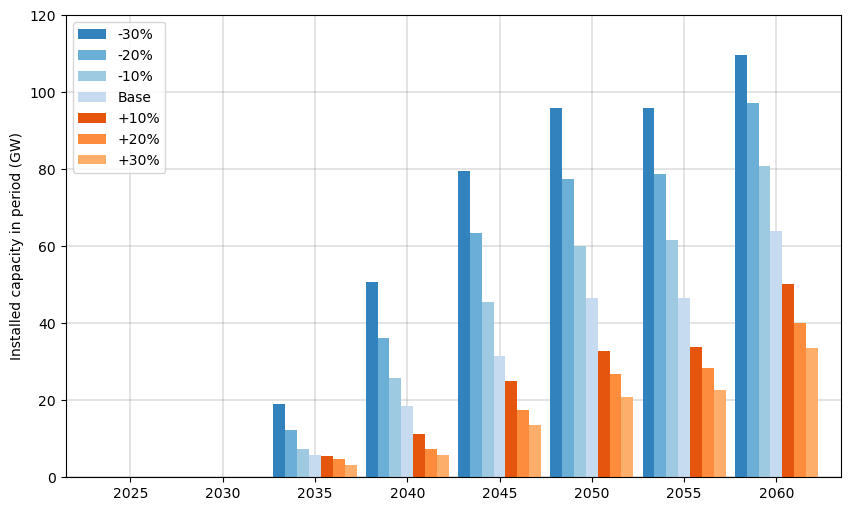

In [218]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NO.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['-30%', '-20%', '-10%', 'Base', '+10%', '+20%', '+30%']

# Plot the grouped data as a bar chart
ax = grouped_data[case_order].plot(kind='bar', figsize=(10, 6), width=0.9)

# Customize the chart
print(f'Installed offshore wind capacity (GW) by different {DESCRIPTION} scenarios NO areas')
ax.set_ylabel('Installed capacity in period (GW)')
ax.set_xlabel(None)
ax.legend(loc='upper left')
ax.set_ylim(0, 120)
ax.set_prop_cycle(cycler(color=[*plt.get_cmap('tab20c').colors, *plt.get_cmap('tab20b').colors]))
ax.yaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.xaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.set_xticklabels(periods_displayed, rotation=0)
plt.show()

#### Change in other technologies

In [201]:
# Get total capacity for techs in given period and case
total_gen_by_case_and_period = df_combined.groupby(['Period', 'Case', 'GeneratorType'])['genInstalledCap_MW'].sum().to_dict()

# Unique values
periods = sorted(set([period for (period, _, _) in total_gen_by_case_and_period.keys()]))
cases = set([case for (_, case, _) in total_gen_by_case_and_period.keys()])
techs = set([tech for (_, _, tech) in total_gen_by_case_and_period.keys()])

# Convert from MW to GW
total_gen_by_case_and_period = {k: v / 1000 for k, v in total_gen_by_case_and_period.items()}

# Create dataframe
df_rows = []
df_cols = ["Period", "Case", "Tech", "Installed capacity GW"]

for (period, case, tech), cap in total_gen_by_case_and_period.items():
    df_rows.append([period, case, tech, cap])

df_total_gen = pd.DataFrame(df_rows, columns=df_cols)
df_total_gen

,Period,Case,Tech,Installed capacity GW
0,2020-2025,+10%,Bio,0.000022
1,2020-2025,+10%,Bio10cofiring,10.845912
2,2020-2025,+10%,Bio10cofiringCCS,0.000000
3,2020-2025,+10%,Bioexisting,34.841000
4,2020-2025,+10%,Coal,0.000193
...,...,...,...,...
1563,2055-2060,Base,Waste,10.556205
1564,2055-2060,Base,Wave,2.352000
1565,2055-2060,Base,Windoffshorefloating,64.755552
1566,2055-2060,Base,Windoffshoregrounded,159.192493


Calculated diff to base for each row

In [202]:
lookup_table = df_total_gen.copy()

def diff_to_base_GW(df_row):
    period = df_row["Period"]
    tech = df_row["Tech"]
    case = "Base"
    base_value = lookup_table[(period == lookup_table["Period"]) & \
                              (tech == lookup_table["Tech"]) & \
                                (case == lookup_table["Case"])]["Installed capacity GW"].sum()
    
    df_row["GW base"] = round(base_value, 1)
    df_row["GW diff to base"] = round(df_row["Installed capacity GW"] - base_value, 1)

    if base_value > 0:
        df_row["GW diff to base %"] = round((df_row["Installed capacity GW"]/base_value - 1) * 100, 1)
    else:
        df_row["GW diff to base %"] = "N/A"

    df_row["Installed capacity GW"] = round(df_row["Installed capacity GW"], 1)

    return df_row

df_total_gen = df_total_gen.apply(lambda row: diff_to_base_GW(row), axis=1)

# Remove small diffs (<10 MW)
df_total_gen_sens = df_total_gen[abs(df_total_gen["GW diff to base"]) > 0.01].reset_index(drop=True)
df_total_gen_sens

,Period,Case,Tech,Installed capacity GW,GW base,GW diff to base,GW diff to base %
0,2020-2025,+10%,Bio10cofiring,10.8,10.4,0.5,4.6
1,2020-2025,+10%,Windonshore,233.1,233.9,-0.8,-0.3
2,2020-2025,+20%,Bio10cofiring,11.1,10.4,0.7,7.2
3,2020-2025,+20%,Lignite,31.7,32.0,-0.3,-0.9
4,2020-2025,+20%,Solar,214.3,213.8,0.5,0.2
...,...,...,...,...,...,...,...
450,2055-2060,-30%,Nuclear,188.8,217.0,-28.2,-13.0
451,2055-2060,-30%,Solar,1852.7,1820.0,32.7,1.8
452,2055-2060,-30%,Windoffshorefloating,107.6,64.8,42.9,66.2
453,2055-2060,-30%,Windoffshoregrounded,245.0,159.2,85.8,53.9


Filter by period and case to look at values

In [207]:
FILTER_PERIOD = "2045-2050" # Installed capacity at end of period (e.g. 2045-2050 = 2050)
FILTER_CASE = "-30%"

df_total_gen_sens_filtered = df_total_gen_sens[(df_total_gen_sens["Period"] == FILTER_PERIOD) & (df_total_gen_sens["Case"] == FILTER_CASE)]
df_total_gen_sens_filtered.sort_values(by=["GW diff to base"], ascending=False)

,Period,Case,Tech,Installed capacity GW,GW base,GW diff to base,GW diff to base %
318,2045-2050,-30%,Windoffshoregrounded,261.8,205.9,55.9,27.1
317,2045-2050,-30%,Windoffshorefloating,78.5,41.7,36.7,88.0
308,2045-2050,-30%,Bio,175.4,165.6,9.8,5.9
310,2045-2050,-30%,GasCCGT,233.8,228.1,5.7,2.5
316,2045-2050,-30%,Solar,1756.3,1755.5,0.8,0.0
312,2045-2050,-30%,Hydroregulated,105.9,105.8,0.1,0.1
313,2045-2050,-30%,Hydrorun-of-the-river,121.7,121.9,-0.2,-0.2
309,2045-2050,-30%,Bio10cofiring,10.1,10.4,-0.3,-2.8
314,2045-2050,-30%,Lignite,31.6,32.0,-0.3,-1.0
311,2045-2050,-30%,GasOCGT,156.6,159.9,-3.4,-2.1
